In [ ]:
This version of scene classifction is an attempt to improve on the models first 
implemented earlier using a more robust knowlenge of CNN layers and data augmentation

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
df=pd.read_csv('./train.csv')
from tensorflow.keras import datasets, layers, models
import os
from os import listdir
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models


In [3]:
from sklearn.model_selection import train_test_split
X=df['image_name'].tolist()
y=df['label'].astype(str).tolist()
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
train=pd.DataFrame(X_train,y_train)
train.reset_index(inplace=True)
train = train.rename(columns = {'index':'label'})
train = train.rename(columns = {0:'image_name'})
print(train)

valid=pd.DataFrame(X_valid,y_valid)
valid.reset_index(inplace=True)
valid = valid.rename(columns = {'index':'label'})
valid = valid.rename(columns = {0:'image_name'})
valid

      label image_name
0         5   6396.jpg
1         5   5728.jpg
2         1  13122.jpg
3         2  10505.jpg
4         0   6587.jpg
...     ...        ...
12770     0  21279.jpg
12771     2   3885.jpg
12772     0   2871.jpg
12773     1   2535.jpg
12774     1  23613.jpg

[12775 rows x 2 columns]


,label,image_name
0,1,21677.jpg
1,4,7369.jpg
2,1,17780.jpg
3,1,10154.jpg
4,0,7636.jpg
...,...,...
4254,1,21587.jpg
4255,4,13375.jpg
4256,2,19284.jpg
4257,4,6381.jpg


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(20, 150, 150, 3)
(150, 150, 3)


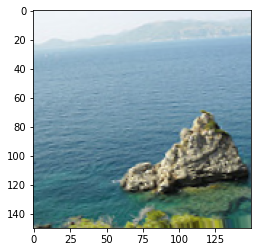

In [4]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255, shear_range=0.1,
                                             zoom_range=0.3,
                                       rotation_range=25,
                                       channel_shift_range=.2,
                                               horizontal_flip=True,
                                      zca_whitening=True)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [5]:
kernel=(3,3)
model = models.Sequential()
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [6]:
history = model.fit(train_gen,
                     
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 147s 222ms/step - loss: 1.5693 - categorical_accuracy: 0.5479 - val_loss: 0.8990 - val_categorical_accuracy: 0.7000
Epoch 2/20
639/639 [==============================] - 85s 134ms/step - loss: 0.8784 - categorical_accuracy: 0.6836 - val_loss: 0.6600 - val_categorical_accuracy: 0.7800
Epoch 3/20
639/639 [==============================] - 84s 132ms/step - loss: 0.7506 - categorical_accuracy: 0.7333 - val_loss: 1.1002 - val_categorical_accuracy: 0.5600
Epoch 4/20
639/639 [==============================] - 85s 134ms/step - loss: 0.6836 - categorical_accuracy: 0.7598 - val_loss: 0.6433 - val_categorical_accuracy: 0.7400
Epoch 5/20
639/639 [==============================] - 83s 129ms/step - loss: 0.6253 - categorical_accuracy: 0.7832 - val_loss: 0.6795 - val_categorical_accuracy: 0.7600
Epoch 6/20
639/639 [==============================] - 84s 131ms/step - loss: 0.5973 - categorical_accuracy: 0.7940 - val_loss: 1.1783 - val_categorical_ac

In [8]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
model.save('saved_model/model3ConvoBatchNorm')

INFO:tensorflow:Assets written to: saved_model/model3ConvoBatchNorm\assets


In [1]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

NameError: name 'acc' is not defined

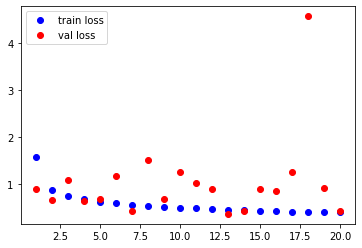

In [12]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Now lets see if 10 more epochs make the model any more accurate 

In [5]:
history = model.fit(train_gen,

                     epochs=30,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/30
639/639 [==============================] - 149s 224ms/step - loss: 1.6328 - categorical_accuracy: 0.5728 - val_loss: 0.9688 - val_categorical_accuracy: 0.6600
Epoch 2/30
639/639 [==============================] - 86s 134ms/step - loss: 0.8430 - categorical_accuracy: 0.6981 - val_loss: 0.8032 - val_categorical_accuracy: 0.7600
Epoch 3/30
639/639 [==============================] - 85s 133ms/step - loss: 0.7283 - categorical_accuracy: 0.7367 - val_loss: 1.2515 - val_categorical_accuracy: 0.6200
Epoch 4/30
639/639 [==============================] - 85s 133ms/step - loss: 0.7465 - categorical_accuracy: 0.7405 - val_loss: 0.6642 - val_categorical_accuracy: 0.7600
Epoch 5/30
639/639 [==============================] - 85s 133ms/step - loss: 0.6327 - categorical_accuracy: 0.7775 - val_loss: 0.8807 - val_categorical_accuracy: 0.7200
Epoch 6/30
639/639 [==============================] - 85s 133ms/step - loss: 0.6050 - categorical_accuracy: 0.7860 - val_loss: 1.7286 - val_categorical_ac

In [6]:
!mkdir -p saved_model
model.save('saved_model/model1')

INFO:tensorflow:Assets written to: saved_model/model1\assets


In [7]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

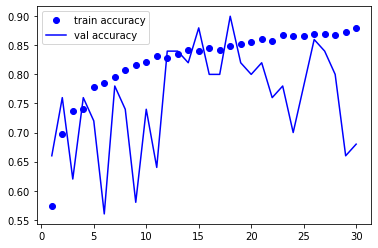

In [8]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

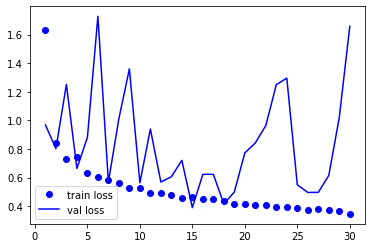

In [9]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

In conclusion adding another 10 epochs does not improve accuarcy. Now lets try a model with one more layer of convulution

In [11]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [12]:
history = model.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 88s 137ms/step - loss: 0.6437 - categorical_accuracy: 0.8413 - val_loss: 0.8066 - val_categorical_accuracy: 0.7200
Epoch 2/20
639/639 [==============================] - 87s 136ms/step - loss: 0.4211 - categorical_accuracy: 0.8659 - val_loss: 0.9065 - val_categorical_accuracy: 0.7200
Epoch 3/20
639/639 [==============================] - 83s 130ms/step - loss: 0.4241 - categorical_accuracy: 0.8643 - val_loss: 0.3939 - val_categorical_accuracy: 0.8400
Epoch 4/20
639/639 [==============================] - 83s 130ms/step - loss: 0.3965 - categorical_accuracy: 0.8746 - val_loss: 0.5827 - val_categorical_accuracy: 0.8800
Epoch 5/20
639/639 [==============================] - 83s 130ms/step - loss: 0.4037 - categorical_accuracy: 0.8701 - val_loss: 1.6612 - val_categorical_accuracy: 0.5600
Epoch 6/20
639/639 [==============================] - 83s 130ms/step - loss: 0.3940 - categorical_accuracy: 0.8751 - val_loss: 0.2480 - val_categorical_acc

In [13]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

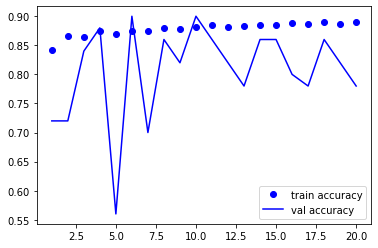

In [14]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

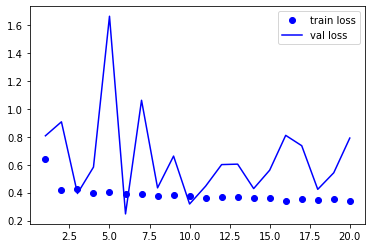

In [15]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

Now I will test GaussianNoise to see how it affects the model

# Model with .3 Gaussian Noise

In [7]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [8]:
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 146s 217ms/step - loss: 1.6553 - categorical_accuracy: 0.5324 - val_loss: 1.2305 - val_categorical_accuracy: 0.5800
Epoch 2/20
639/639 [==============================] - 85s 132ms/step - loss: 1.0032 - categorical_accuracy: 0.6366 - val_loss: 0.9399 - val_categorical_accuracy: 0.7200
Epoch 3/20
639/639 [==============================] - 84s 131ms/step - loss: 0.8637 - categorical_accuracy: 0.6860 - val_loss: 2.1273 - val_categorical_accuracy: 0.5600
Epoch 4/20
639/639 [==============================] - 85s 132ms/step - loss: 0.7627 - categorical_accuracy: 0.7201 - val_loss: 1.2521 - val_categorical_accuracy: 0.7200
Epoch 5/20
639/639 [==============================] - 83s 131ms/step - loss: 0.7219 - categorical_accuracy: 0.7448 - val_loss: 1.0353 - val_categorical_accuracy: 0.6200
Epoch 6/20
639/639 [==============================] - 83s 130ms/step - loss: 0.6469 - categorical_accuracy: 0.7728 - val_loss: 1.8863 - val_categorical_ac

Looking at the numbers it seems the Gaussian noise did not help, lets try a lower value such as .15

# Model With .15 Gaussian Noise

In [9]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [10]:
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 84s 130ms/step - loss: 1.4301 - categorical_accuracy: 0.5583 - val_loss: 2.7404 - val_categorical_accuracy: 0.4800
Epoch 2/20
639/639 [==============================] - 84s 131ms/step - loss: 0.8334 - categorical_accuracy: 0.6976 - val_loss: 3.1873 - val_categorical_accuracy: 0.3800
Epoch 3/20
639/639 [==============================] - 84s 132ms/step - loss: 0.7282 - categorical_accuracy: 0.7432 - val_loss: 1.4047 - val_categorical_accuracy: 0.6600
Epoch 4/20
639/639 [==============================] - 88s 138ms/step - loss: 0.6604 - categorical_accuracy: 0.7652 - val_loss: 1.8042 - val_categorical_accuracy: 0.5600
Epoch 5/20
639/639 [==============================] - 85s 133ms/step - loss: 0.6389 - categorical_accuracy: 0.7759 - val_loss: 2.1293 - val_categorical_accuracy: 0.5000
Epoch 6/20
639/639 [==============================] - 83s 129ms/step - loss: 0.6034 - categorical_accuracy: 0.7859 - val_loss: 0.9640 - val_categorical_acc

Looking at the numbers it seems lowering the Gaussian noise did not help, lets try a highwe value such as .5

# Model with .5 Gaussian Noise

In [11]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianNoise(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [12]:
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 88s 134ms/step - loss: 2.0448 - categorical_accuracy: 0.4856 - val_loss: 10.6906 - val_categorical_accuracy: 0.3400
Epoch 2/20
639/639 [==============================] - 86s 135ms/step - loss: 1.1704 - categorical_accuracy: 0.5559 - val_loss: 2.2597 - val_categorical_accuracy: 0.4600
Epoch 3/20
639/639 [==============================] - 87s 137ms/step - loss: 1.0544 - categorical_accuracy: 0.6142 - val_loss: 5.4060 - val_categorical_accuracy: 0.5600
Epoch 4/20
639/639 [==============================] - 89s 139ms/step - loss: 0.9132 - categorical_accuracy: 0.6811 - val_loss: 6.8484 - val_categorical_accuracy: 0.4400
Epoch 5/20
639/639 [==============================] - 84s 132ms/step - loss: 0.8104 - categorical_accuracy: 0.7162 - val_loss: 10.6058 - val_categorical_accuracy: 0.4400
Epoch 6/20
639/639 [==============================] - 87s 136ms/step - loss: 0.7377 - categorical_accuracy: 0.7428 - val_loss: 32.7424 - val_categorical_

It seems Guassian Noise is not helping, lets try Gaussian dropout

# Model With .15 Gaussian Dropout

In [4]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [5]:
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 164s 245ms/step - loss: 1.7938 - categorical_accuracy: 0.5034 - val_loss: 1.9671 - val_categorical_accuracy: 0.2800
Epoch 2/20
639/639 [==============================] - 90s 141ms/step - loss: 0.9969 - categorical_accuracy: 0.6204 - val_loss: 1.1899 - val_categorical_accuracy: 0.6400
Epoch 3/20
639/639 [==============================] - 87s 137ms/step - loss: 0.8925 - categorical_accuracy: 0.6688 - val_loss: 0.8815 - val_categorical_accuracy: 0.6800
Epoch 4/20
639/639 [==============================] - 86s 135ms/step - loss: 0.7843 - categorical_accuracy: 0.7190 - val_loss: 1.1303 - val_categorical_accuracy: 0.5600
Epoch 5/20
639/639 [==============================] - 94s 148ms/step - loss: 0.7275 - categorical_accuracy: 0.7436 - val_loss: 1.8049 - val_categorical_accuracy: 0.4800
Epoch 6/20
639/639 [==============================] - 113s 177ms/step - loss: 0.7040 - categorical_accuracy: 0.7479 - val_loss: 0.4092 - val_categorical_a

# Model with .3 Gaussian Dropout

In [7]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [8]:
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 95s 147ms/step - loss: 1.9586 - categorical_accuracy: 0.5045 - val_loss: 2.7351 - val_categorical_accuracy: 0.6200
Epoch 2/20
639/639 [==============================] - 85s 133ms/step - loss: 1.0385 - categorical_accuracy: 0.6134 - val_loss: 1.7013 - val_categorical_accuracy: 0.6800
Epoch 3/20
639/639 [==============================] - 88s 138ms/step - loss: 0.8308 - categorical_accuracy: 0.6999 - val_loss: 1.4345 - val_categorical_accuracy: 0.6200
Epoch 4/20
639/639 [==============================] - 87s 136ms/step - loss: 0.7397 - categorical_accuracy: 0.7359 - val_loss: 3.3763 - val_categorical_accuracy: 0.5000
Epoch 5/20
639/639 [==============================] - 90s 140ms/step - loss: 0.6929 - categorical_accuracy: 0.7509 - val_loss: 1.3357 - val_categorical_accuracy: 0.6600
Epoch 6/20
639/639 [==============================] - 89s 139ms/step - loss: 0.6477 - categorical_accuracy: 0.7697 - val_loss: 7.0802 - val_categorical_acc

In [9]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

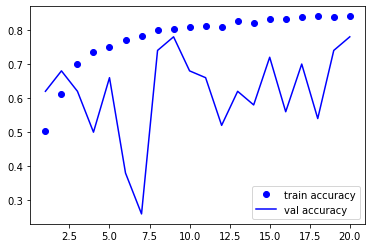

In [10]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'b',label="val accuracy")
plt.legend()
plt.show()

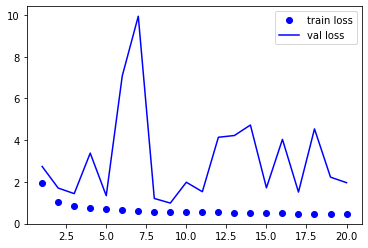

In [11]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.legend()
plt.show()

it seems .3 performs better than .15 so lets try .5 guasisanDropout

# Model with .5 Gaussian Dropout

In [4]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [5]:
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 88s 132ms/step - loss: 1.8576 - categorical_accuracy: 0.4947 - val_loss: 16.2884 - val_categorical_accuracy: 0.2600
Epoch 2/20
639/639 [==============================] - 83s 130ms/step - loss: 1.1034 - categorical_accuracy: 0.5908 - val_loss: 5.0325 - val_categorical_accuracy: 0.5200
Epoch 3/20
639/639 [==============================] - 83s 131ms/step - loss: 0.9665 - categorical_accuracy: 0.6472 - val_loss: 16.1352 - val_categorical_accuracy: 0.5200
Epoch 4/20
639/639 [==============================] - 85s 133ms/step - loss: 0.8538 - categorical_accuracy: 0.6943 - val_loss: 6.5300 - val_categorical_accuracy: 0.5600
Epoch 5/20
639/639 [==============================] - 85s 132ms/step - loss: 0.7965 - categorical_accuracy: 0.7213 - val_loss: 3.9718 - val_categorical_accuracy: 0.6000
Epoch 6/20
639/639 [==============================] - 85s 132ms/step - loss: 0.7268 - categorical_accuracy: 0.7502 - val_loss: 7.6389 - val_categorical_a

The above results that high dropout rate ;eads to severe overfitting.

# Lets try just one layer of Gaussian dropout at the end of the model and see how that effects the results

In [6]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())

model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())

model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())

model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 84s 130ms/step - loss: 1.4620 - categorical_accuracy: 0.5586 - val_loss: 1.1133 - val_categorical_accuracy: 0.7000
Epoch 2/20
639/639 [==============================] - 83s 130ms/step - loss: 0.8533 - categorical_accuracy: 0.6885 - val_loss: 0.9124 - val_categorical_accuracy: 0.6400
Epoch 3/20
639/639 [==============================] - 82s 129ms/step - loss: 0.7778 - categorical_accuracy: 0.7231 - val_loss: 2.3461 - val_categorical_accuracy: 0.4400
Epoch 4/20
639/639 [==============================] - 82s 128ms/step - loss: 0.7087 - categorical_accuracy: 0.7479 - val_loss: 1.0663 - val_categorical_accuracy: 0.5400
Epoch 5/20
639/639 [==============================] - 83s 130ms/step - loss: 0.6460 - categorical_accuracy: 0.7695 - val_loss: 0.5159 - val_categorical_accuracy: 0.8400
Epoch 6/20
639/639 [==============================] - 81s 127ms/step - loss: 0.6108 - categorical_accuracy: 0.7848 - val_loss: 0.9827 - val_categorical_acc

In [7]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

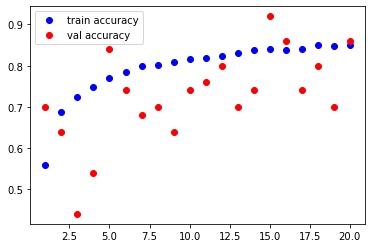

In [8]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

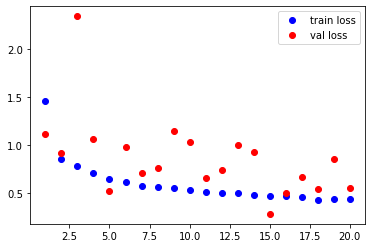

In [9]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

# Now lets try a model that does one GaussianDropout per convo and then before the dense layer 

In [10]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.GaussianDropout(.3))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 85s 131ms/step - loss: 1.9508 - categorical_accuracy: 0.4626 - val_loss: 4.8296 - val_categorical_accuracy: 0.5200
Epoch 2/20
639/639 [==============================] - 82s 128ms/step - loss: 1.0537 - categorical_accuracy: 0.6058 - val_loss: 1.1827 - val_categorical_accuracy: 0.6800
Epoch 3/20
639/639 [==============================] - 84s 132ms/step - loss: 0.8925 - categorical_accuracy: 0.6759 - val_loss: 2.1153 - val_categorical_accuracy: 0.5800
Epoch 4/20
639/639 [==============================] - 86s 134ms/step - loss: 0.7978 - categorical_accuracy: 0.7166 - val_loss: 2.4303 - val_categorical_accuracy: 0.5400
Epoch 5/20
639/639 [==============================] - 83s 130ms/step - loss: 0.7283 - categorical_accuracy: 0.7407 - val_loss: 1.4755 - val_categorical_accuracy: 0.5800
Epoch 6/20
639/639 [==============================] - 84s 131ms/step - loss: 0.6913 - categorical_accuracy: 0.7560 - val_loss: 1.3464 - val_categorical_acc

In conclusion it seems that changing the order did not change a bit did not imporve the previous model. Lets implment regular dropout to see how it compares with gaussian dropout

# Model With Dropout at a rate of .15

In [6]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.15))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 84s 129ms/step - loss: 1.8230 - categorical_accuracy: 0.5268 - val_loss: 1.5515 - val_categorical_accuracy: 0.4800
Epoch 2/20
639/639 [==============================] - 84s 132ms/step - loss: 1.0000 - categorical_accuracy: 0.6261 - val_loss: 0.8368 - val_categorical_accuracy: 0.7200
Epoch 3/20
639/639 [==============================] - 83s 130ms/step - loss: 0.8029 - categorical_accuracy: 0.7113 - val_loss: 1.2024 - val_categorical_accuracy: 0.6400
Epoch 4/20
639/639 [==============================] - 82s 129ms/step - loss: 0.7434 - categorical_accuracy: 0.7355 - val_loss: 0.6608 - val_categorical_accuracy: 0.7800
Epoch 5/20
639/639 [==============================] - 84s 132ms/step - loss: 0.6685 - categorical_accuracy: 0.7623 - val_loss: 1.1479 - val_categorical_accuracy: 0.6600
Epoch 6/20
639/639 [==============================] - 83s 129ms/step - loss: 0.6437 - categorical_accuracy: 0.7739 - val_loss: 1.1498 - val_categorical_acc

it seems that dropout of .15 performed of so lets try a slightly higher rate of  .3

# Model With a dropout rate of .3

In [7]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 84s 129ms/step - loss: 1.9101 - categorical_accuracy: 0.5389 - val_loss: 2.3856 - val_categorical_accuracy: 0.5600
Epoch 2/20
639/639 [==============================] - 83s 130ms/step - loss: 0.9717 - categorical_accuracy: 0.6484 - val_loss: 3.0199 - val_categorical_accuracy: 0.4200
Epoch 3/20
639/639 [==============================] - 84s 132ms/step - loss: 0.8100 - categorical_accuracy: 0.7102 - val_loss: 1.3676 - val_categorical_accuracy: 0.6600
Epoch 4/20
639/639 [==============================] - 84s 131ms/step - loss: 0.6822 - categorical_accuracy: 0.7566 - val_loss: 2.4628 - val_categorical_accuracy: 0.4600
Epoch 5/20
639/639 [==============================] - 83s 130ms/step - loss: 0.6540 - categorical_accuracy: 0.7710 - val_loss: 0.9265 - val_categorical_accuracy: 0.6600
Epoch 6/20
639/639 [==============================] - 82s 129ms/step - loss: 0.6290 - categorical_accuracy: 0.7803 - val_loss: 0.8083 - val_categorical_acc

In [8]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

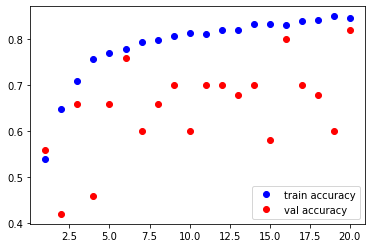

In [9]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

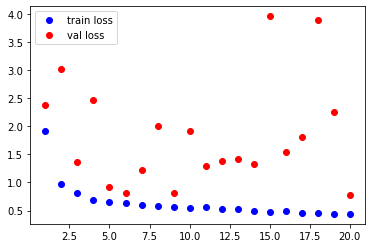

In [10]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

This model performed ok lets try a higher dropout rate of .5

# Model with a dropout Rate of .5 

In [11]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.5))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)

Epoch 1/20
639/639 [==============================] - 87s 135ms/step - loss: 1.8437 - categorical_accuracy: 0.5135 - val_loss: 4.8570 - val_categorical_accuracy: 0.5400
Epoch 2/20
639/639 [==============================] - 87s 136ms/step - loss: 0.9676 - categorical_accuracy: 0.6460 - val_loss: 2.2213 - val_categorical_accuracy: 0.5600
Epoch 3/20
639/639 [==============================] - 86s 134ms/step - loss: 0.8226 - categorical_accuracy: 0.7033 - val_loss: 3.3807 - val_categorical_accuracy: 0.5400
Epoch 4/20
639/639 [==============================] - 89s 139ms/step - loss: 0.7261 - categorical_accuracy: 0.7400 - val_loss: 2.1405 - val_categorical_accuracy: 0.6200
Epoch 5/20
639/639 [==============================] - 87s 137ms/step - loss: 0.6977 - categorical_accuracy: 0.7530 - val_loss: 4.9550 - val_categorical_accuracy: 0.4200
Epoch 6/20
639/639 [==============================] - 89s 140ms/step - loss: 0.6386 - categorical_accuracy: 0.7689 - val_loss: 2.4913 - val_categorical_acc

That model performed poorly lets try a very simple model with only one convultion and dropout

# Model with only one Convultion Layer and Dropout

In [15]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)



Epoch 1/20
639/639 [==============================] - 85s 131ms/step - loss: 3.2663 - categorical_accuracy: 0.3317 - val_loss: 1.2005 - val_categorical_accuracy: 0.6600
Epoch 2/20
639/639 [==============================] - 84s 131ms/step - loss: 1.4196 - categorical_accuracy: 0.4338 - val_loss: 5.9724 - val_categorical_accuracy: 0.5000
Epoch 3/20
639/639 [==============================] - 84s 132ms/step - loss: 1.2120 - categorical_accuracy: 0.5058 - val_loss: 10.6838 - val_categorical_accuracy: 0.4200
Epoch 4/20
639/639 [==============================] - 89s 140ms/step - loss: 1.1354 - categorical_accuracy: 0.5389 - val_loss: 1.4174 - val_categorical_accuracy: 0.4400
Epoch 5/20
639/639 [==============================] - 83s 130ms/step - loss: 1.0989 - categorical_accuracy: 0.5505 - val_loss: 1.1132 - val_categorical_accuracy: 0.5200
Epoch 6/20
639/639 [==============================] - 85s 133ms/step - loss: 1.0413 - categorical_accuracy: 0.5797 - val_loss: 1.1213 - val_categorical_ac

lets try one convulultion and and no dropout to see if the dropout is helping at all

In [10]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)


Epoch 1/20
639/639 [==============================] - 84s 130ms/step - loss: 2.1594 - categorical_accuracy: 0.4596 - val_loss: 1.2131 - val_categorical_accuracy: 0.5400
Epoch 2/20
639/639 [==============================] - 84s 131ms/step - loss: 1.2063 - categorical_accuracy: 0.5422 - val_loss: 1.1764 - val_categorical_accuracy: 0.6000
Epoch 3/20
639/639 [==============================] - 86s 135ms/step - loss: 1.0416 - categorical_accuracy: 0.6035 - val_loss: 0.8054 - val_categorical_accuracy: 0.6400
Epoch 4/20
639/639 [==============================] - 82s 129ms/step - loss: 0.9565 - categorical_accuracy: 0.6405 - val_loss: 0.9279 - val_categorical_accuracy: 0.6800
Epoch 5/20
639/639 [==============================] - 82s 128ms/step - loss: 0.9025 - categorical_accuracy: 0.6622 - val_loss: 0.9105 - val_categorical_accuracy: 0.5800
Epoch 6/20
639/639 [==============================] - 83s 130ms/step - loss: 0.8907 - categorical_accuracy: 0.6683 - val_loss: 0.8236 - val_categorical_acc

In [12]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

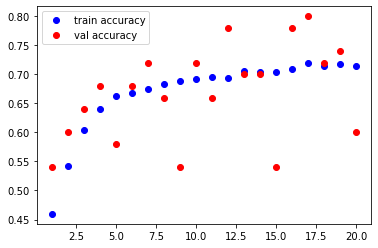

In [13]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

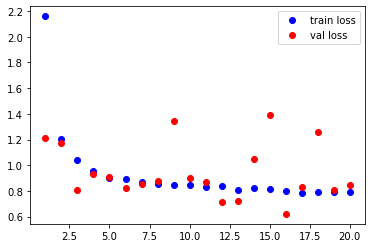

In [14]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

As seen by these numbers the model is slightly underfitting lets try a 2 convultion model with dropout

# 2 Convo with dropout at rate of .3

In [6]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(.3))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)


Epoch 1/20
639/639 [==============================] - 85s 132ms/step - loss: 2.8189 - categorical_accuracy: 0.3213 - val_loss: 2.3656 - val_categorical_accuracy: 0.4400
Epoch 2/20
639/639 [==============================] - 87s 136ms/step - loss: 1.3223 - categorical_accuracy: 0.4418 - val_loss: 1.2423 - val_categorical_accuracy: 0.4800
Epoch 3/20
639/639 [==============================] - 84s 131ms/step - loss: 1.1981 - categorical_accuracy: 0.4943 - val_loss: 3.2182 - val_categorical_accuracy: 0.4200
Epoch 4/20
639/639 [==============================] - 83s 129ms/step - loss: 1.0735 - categorical_accuracy: 0.5523 - val_loss: 3.0923 - val_categorical_accuracy: 0.4400
Epoch 5/20
639/639 [==============================] - 83s 130ms/step - loss: 0.9705 - categorical_accuracy: 0.6101 - val_loss: 5.9632 - val_categorical_accuracy: 0.3600
Epoch 6/20
639/639 [==============================] - 85s 133ms/step - loss: 0.9076 - categorical_accuracy: 0.6337 - val_loss: 3.8502 - val_categorical_acc

This model seems to perform poorly lets try a model without dropout to see how the two compare.

In [7]:
kernel=(3,3)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model2.fit(train_gen,

                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=10)


Epoch 1/20
639/639 [==============================] - 83s 128ms/step - loss: 2.3763 - categorical_accuracy: 0.4657 - val_loss: 0.9193 - val_categorical_accuracy: 0.6600
Epoch 2/20
639/639 [==============================] - 81s 127ms/step - loss: 1.0919 - categorical_accuracy: 0.5841 - val_loss: 0.8579 - val_categorical_accuracy: 0.6600
Epoch 3/20
639/639 [==============================] - 81s 126ms/step - loss: 0.9712 - categorical_accuracy: 0.6193 - val_loss: 1.1837 - val_categorical_accuracy: 0.5000
Epoch 4/20
639/639 [==============================] - 80s 125ms/step - loss: 0.9659 - categorical_accuracy: 0.6333 - val_loss: 1.0275 - val_categorical_accuracy: 0.5200
Epoch 5/20
639/639 [==============================] - 82s 128ms/step - loss: 0.9033 - categorical_accuracy: 0.6562 - val_loss: 0.8256 - val_categorical_accuracy: 0.7000
Epoch 6/20
639/639 [==============================] - 81s 127ms/step - loss: 0.8044 - categorical_accuracy: 0.7032 - val_loss: 0.9949 - val_categorical_acc

In [12]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
model2.save('saved_model/model2ConvoBatchNorm')

INFO:tensorflow:Assets written to: saved_model/model2ConvoBatchNorm\assets


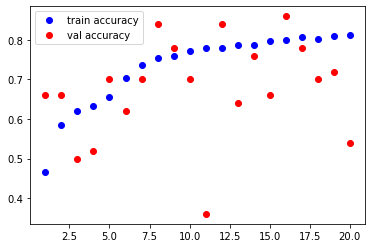

In [9]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

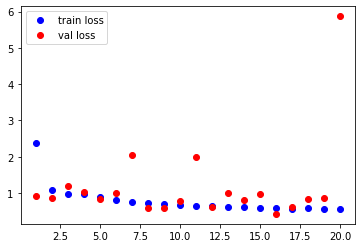

In [10]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

As seen by the plots a model with 2 convolutions, batch normaliztion and no dropout is slightly worse than the similar model tested before with 3 convolutions